##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [ ]:
tf.nn.softmax(predictions).numpy()

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [ ]:
model.fit(x_train, y_train, epochs=5)

The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 假设数据已加载
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

# 数据预处理
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

# 增加通道维度
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

# 定义变量
width = train_data.shape[1]
height = train_data.shape[2]
output_dim = width * height

# 定义模型
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(output_dim))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# 评估模型
test_loss = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)

# 预测
predictions = model.predict(test_data)

# 可视化预测结果与真实结果对比
plt.figure(figsize=(12, 6))

# 预测结果图
plt.subplot(1, 2, 1)
plt.imshow(predictions[0].reshape(width, height), cmap='jet')
plt.title('Predicted Velocity Model')
plt.colorbar()

# 真实标签图
plt.subplot(1, 2, 2)
plt.imshow(test_labels[0].reshape(width, height), cmap='jet')
plt.title('True Velocity Model')
plt.colorbar()

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'train_data.npy'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# 获取当前工作目录
current_dir = os.getcwd()

# 设置数据文件路径，假设数据文件在 'data' 文件夹下
data_dir = os.path.join(current_dir, 'data')

# 假设数据已加载，使用完整路径加载数据
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'))

# 数据预处理
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

# 增加通道维度
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

# 定义变量
width = train_data.shape[1]
height = train_data.shape[2]
output_dim = width * height

# 定义模型
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(output_dim))

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# 评估模型
test_loss = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)

# 预测
predictions = model.predict(test_data)

# 可视化预测结果与真实结果对比
plt.figure(figsize=(12, 6))

# 预测结果图
plt.subplot(1, 2, 1)
plt.imshow(predictions[0].reshape(width, height), cmap='jet')
plt.title('Predicted Velocity Model')
plt.colorbar()

# 真实标签图
plt.subplot(1, 2, 2)
plt.imshow(test_labels[0].reshape(width, height), cmap='jet')
plt.title('True Velocity Model')
plt.colorbar()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/train_data.npy'

In [3]:
# prompt: 神经网络地震层析

import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers

# 获取当前工作目录
current_dir = os.getcwd()

# 设置数据文件路径，假设数据文件在 'data' 文件夹下，并可以修改
data_dir = os.path.join(current_dir, 'data')

# 检查数据目录是否存在，如果不存在则创建
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# 使用占位符文件，实际使用时替换成你的数据文件
# 创建示例数据文件
example_train_data = np.random.rand(100, 64, 64)
np.save(os.path.join(data_dir, 'train_data.npy'), example_train_data)
example_train_labels = np.random.rand(100, 64, 64)
np.save(os.path.join(data_dir, 'train_labels.npy'), example_train_labels)
example_test_data = np.random.rand(20, 64, 64)
np.save(os.path.join(data_dir, 'test_data.npy'), example_test_data)
example_test_labels = np.random.rand(20, 64, 64)
np.save(os.path.join(data_dir, 'test_labels.npy'), example_test_labels)


# 加载数据
try:
  train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
  train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'))
  test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
  test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'))
except FileNotFoundError:
  print("Error: Data files not found. Please check the 'data' directory or provide the correct path.")
  exit()

# 数据预处理
train_data = train_data / np.max(train_data)
test_data = test_data / np.max(test_data)

# 增加通道维度
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

# 定义变量
width = train_data.shape[1]
height = train_data.shape[2]
output_dim = width * height

# 定义模型
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(output_dim)
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# 评估模型
test_loss = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)

# 预测
predictions = model.predict(test_data)

# 可视化预测结果与真实结果对比
# ... (rest of the visualization code remains the same)

Directory '/content/data' created.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


ValueError: Dimensions must be equal, but are 64 and 4096 for '{{node compile_loss/mean_squared_error/sub}} = Sub[T=DT_FLOAT](data_1, sequential_1/dense_1_2/Add)' with input shapes: [?,64,64], [?,4096].

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - loss: 0.3246 - val_loss: 0.2707
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.2380 - val_loss: 0.1564
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.1442 - val_loss: 0.1054
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.1037 - val_loss: 0.0920
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0921 - val_loss: 0.0896
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0894 - val_loss: 0.0885
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0879 - val_loss: 0.0877
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 0.0866 - val_loss: 0.0866
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - loss: 0.0852 - val_loss: 0.0860
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - loss: 0.0844 - val_loss: 0.0858
1/1 - 0s - 78ms/step - loss: 0.0858
Test loss: 0.08583871275186539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


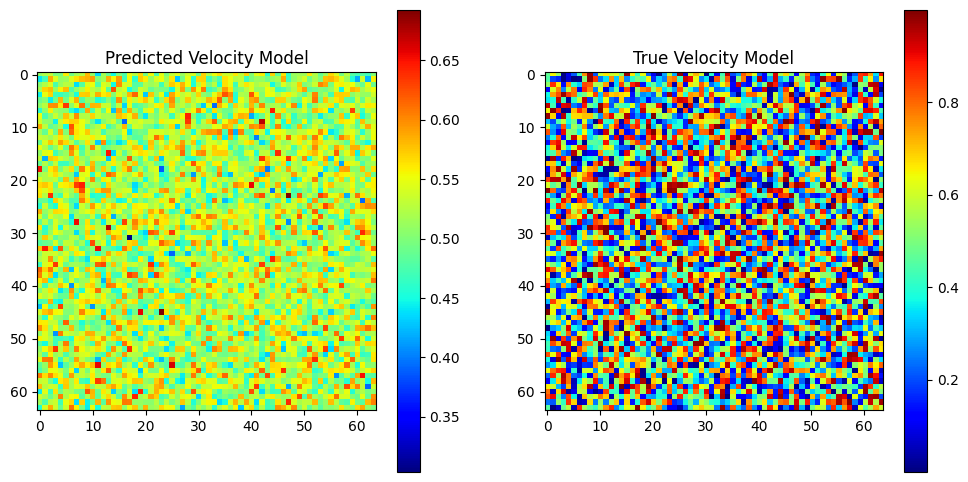

In [12]:
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers

# 设置数据文件路径，假设数据文件在 'data' 文件夹下
data_dir = os.path.join(os.getcwd(), 'data')

# 检查数据目录是否存在，如果不存在则创建
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# 生成示例数据
width = 64
height = 64
num_samples = 100

# 训练数据：随机生成 100 个 64x64 的矩阵
train_data = np.random.rand(num_samples, width, height, 1)
# 训练标签：与训练数据相同，模拟地震层析成像中的速度模型
train_labels = train_data.copy()

# 测试数据：随机生成 20 个 64x64 的矩阵
test_data = np.random.rand(20, width, height, 1)
# 测试标签：与测试数据相同
test_labels = test_data.copy()

# 保存数据到文件
np.save(os.path.join(data_dir, 'train_data.npy'), train_data)
np.save(os.path.join(data_dir, 'train_labels.npy'), train_labels)
np.save(os.path.join(data_dir, 'test_data.npy'), test_data)
np.save(os.path.join(data_dir, 'test_labels.npy'), test_labels)

# 加载数据
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'))


# 定义模型
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(width * height), # 输出维度为 width * height
    layers.Reshape((width, height,1)) # 重新塑形为 (width, height,1)
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# 评估模型
test_loss = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)

# 预测
predictions = model.predict(test_data)

# 可视化预测结果与真实结果对比
plt.figure(figsize=(12, 6))

# 预测结果图
plt.subplot(1, 2, 1)
plt.imshow(predictions[0].reshape(width, height), cmap='jet')
plt.title('Predicted Velocity Model')
plt.colorbar()

# 真实标签图
plt.subplot(1, 2, 2)
plt.imshow(test_labels[0].reshape(width, height), cmap='jet')
plt.title('True Velocity Model')
plt.colorbar()

plt.show()

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - loss: 0.3280 - val_loss: 0.2818
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - loss: 0.2600 - val_loss: 0.1770
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - loss: 0.1680 - val_loss: 0.1233
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.1176 - val_loss: 0.1032
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0979 - val_loss: 0.0935
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.0905 - val_loss: 0.0895
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - loss: 0.0876 - val_loss: 0.0875
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - loss: 0.0859 - val_loss: 0.0870
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0852 - val_loss: 0.0869
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0843 - val_loss: 0.0857
1/1 - 0s - 48ms/step - loss: 0.0857
Test loss: 0.08572517335414886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


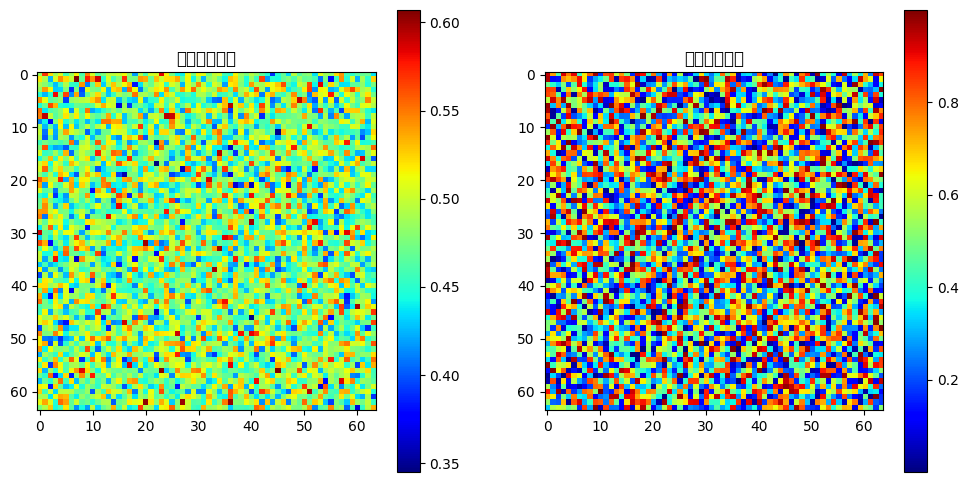

In [10]:
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from tensorflow import keras
from tensorflow.keras import layers

# 设置数据文件路径，假设数据文件在 'data' 文件夹下
data_dir = os.path.join(os.getcwd(), 'data')

# 检查数据目录是否存在，如果不存在则创建
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# 生成示例数据
width = 64
height = 64
num_samples = 100

# 训练数据：随机生成 100 个 64x64 的矩阵
train_data = np.random.rand(num_samples, width, height, 1)
# 训练标签：与训练数据相同，模拟地震层析成像中的速度模型
train_labels = train_data.copy()

# 测试数据：随机生成 20 个 64x64 的矩阵
test_data = np.random.rand(20, width, height, 1)
# 测试标签：与测试数据相同
test_labels = test_data.copy()

# 保存数据到文件
np.save(os.path.join(data_dir, 'train_data.npy'), train_data)
np.save(os.path.join(data_dir, 'train_labels.npy'), train_labels)
np.save(os.path.join(data_dir, 'test_data.npy'), test_data)
np.save(os.path.join(data_dir, 'test_labels.npy'), test_labels)

# 加载数据
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'))

# 设置中文字体
# 查找系统中可用的中文字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_paths:
    if 'SimHei' in font_path:  # 例如，使用SimHei字体，你可以根据需要替换成其他字体
        simhei_font = font_path
        break

# 如果找到SimHei字体，则设置matplotlib的默认字体
if 'simhei_font' in locals():
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

# 定义模型
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(width * height), # 输出维度为 width * height
    layers.Reshape((width, height, 1)) # 重新塑形为 (width, height, 1)
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# 评估模型
test_loss = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)

# 预测
predictions = model.predict(test_data)

# 可视化预测结果与真实结果对比
plt.figure(figsize=(12, 6))

# 预测结果图
plt.subplot(1, 2, 1)
plt.imshow(predictions[0].reshape(width, height), cmap='jet')
plt.title('预测速度模型')  # 中文标题
plt.colorbar()

# 真实标签图
plt.subplot(1, 2, 2)
plt.imshow(test_labels[0].reshape(width, height), cmap='jet')
plt.title('真实速度模型')  # 中文标题
plt.colorbar()

plt.show()

未找到 SimHei 字体，请确保已安装该字体或尝试其他中文字体。
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - loss: 0.3266 - val_loss: 0.2641
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - loss: 0.2376 - val_loss: 0.1535
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.1435 - val_loss: 0.1083
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - loss: 0.1027 - val_loss: 0.0944
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0914 - val_loss: 0.0901
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0884 - val_loss: 0.0892
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0871 - val_loss: 0.0880
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - loss: 0.0856 - val_loss: 0.0863
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 0.0845 - val_loss: 0.0858
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0841 - val_loss: 0.0857
1/1 - 0s - 47ms/step - loss: 0.0857
Test loss: 0.08569663763046265
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


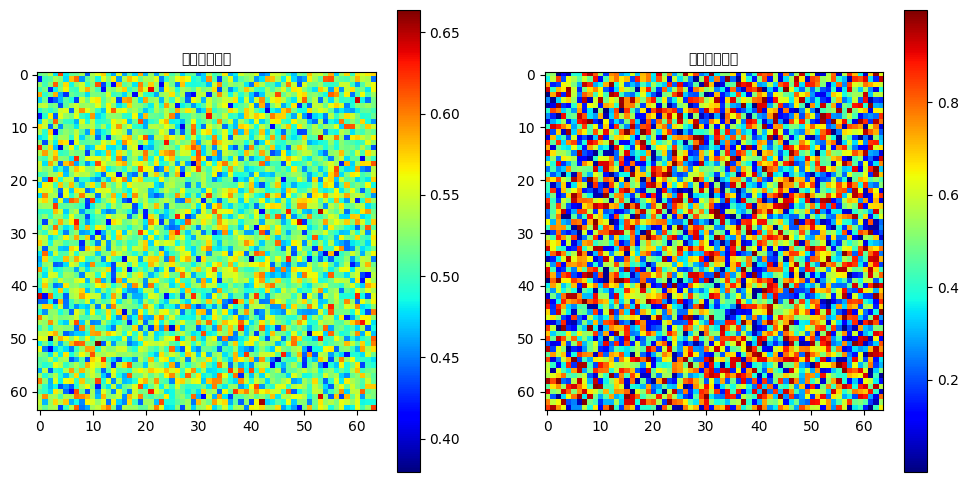

In [11]:
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from tensorflow import keras
from tensorflow.keras import layers

# 设置数据文件路径，假设数据文件在 'data' 文件夹下
data_dir = os.path.join(os.getcwd(), 'data')

# 检查数据目录是否存在，如果不存在则创建
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"Directory '{data_dir}' created.")

# 生成示例数据
width = 64
height = 64
num_samples = 100

# 训练数据：随机生成 100 个 64x64 的矩阵
train_data = np.random.rand(num_samples, width, height, 1)
# 训练标签：与训练数据相同，模拟地震层析成像中的速度模型
train_labels = train_data.copy()

# 测试数据：随机生成 20 个 64x64 的矩阵
test_data = np.random.rand(20, width, height, 1)
# 测试标签：与测试数据相同
test_labels = test_data.copy()

# 保存数据到文件
np.save(os.path.join(data_dir, 'train_data.npy'), train_data)
np.save(os.path.join(data_dir, 'train_labels.npy'), train_labels)
np.save(os.path.join(data_dir, 'test_data.npy'), test_data)
np.save(os.path.join(data_dir, 'test_labels.npy'), test_labels)

# 加载数据
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
train_labels = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
test_labels = np.load(os.path.join(data_dir, 'test_labels.npy'))

# 设置中文字体
# 查找系统中可用的中文字体，并尝试找到 SimHei 字体
font_paths = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font_path in font_paths:
    if 'SimHei' in font_path:
        simhei_font = font_path
        break

# 如果找到 SimHei 字体，则使用它
if 'simhei_font' in locals():
    font = fm.FontProperties(fname=simhei_font)
else:
    print("未找到 SimHei 字体，请确保已安装该字体或尝试其他中文字体。")
    # 如果未找到 SimHei 字体，可以使用系统默认字体
    font = fm.FontProperties()

# 定义模型
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(width * height), # 输出维度为 width * height
    layers.Reshape((width, height, 1)) # 重新塑形为 (width, height, 1)
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# 评估模型
test_loss = model.evaluate(test_data, test_labels, verbose=2)
print('Test loss:', test_loss)

# 预测
predictions = model.predict(test_data)

# 可视化预测结果与真实结果对比
plt.figure(figsize=(12, 6))

# 预测结果图
plt.subplot(1, 2, 1)
plt.imshow(predictions[0].reshape(width, height), cmap='jet')
plt.title('预测速度模型', fontproperties=font)  # 使用 fontproperties 参数
plt.colorbar()

# 真实标签图
plt.subplot(1, 2, 2)
plt.imshow(test_labels[0].reshape(width, height), cmap='jet')
plt.title('真实速度模型', fontproperties=font)  # 使用 fontproperties 参数
plt.colorbar()

plt.show()
